In [4]:
import cv2
import numpy as np

In [3]:
face_classifier = cv2.CascadeClassifier('C:\\Users\\Siddhant\\Desktop\\Machine Learning Projects Home\\FACE RECOGNITION\\data\\haarcascade_frontalface_default.xml')

def face_extraction(img):
    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    for (x, y, w, h) in faces:
        x = x - 10
        y = y - 10
        cropped_face = img[y:y+h+50, x:x+w+50]
    return cropped_face
    
cam = cv2.VideoCapture(0)
c = 0

while True:
    ret, frame = cam.read()
    if face_extraction(frame) is not None:
        c += 1
        face = cv2.resize(face_extraction(frame), (400,400))
        
        file_path = r'C:\Users\Siddhant\Desktop\Machine Learning Projects Home\FACE RECOGNITION\Images1\images' + str(c) + '.jpg'
        cv2.imwrite(file_path, frame)
        
        cv2.putText(face, str(c), (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 2)
        cv2.imshow('Video', frame)
    else:
        print('Face not Found')
        pass
    if c == 100:
        break
        
cam.release()
cv2.destroyAllWindows()
print('Task Completed!')

Task Completed!


In [9]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Input, Lambda
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model, Sequential
from glob import glob
import matplotlib.pyplot as plt

In [10]:
IMG_SIZE = [224, 224]
train_path = r'C:\Users\Siddhant\Desktop\Machine Learning Projects Home\FACE RECOGNITION\Datasets\Train'
test_path = r'C:\Users\Siddhant\Desktop\Machine Learning Projects Home\FACE RECOGNITION\Datasets\Test'

vgg = VGG16(input_shape = IMG_SIZE + [3], weights = 'imagenet', include_top = False)

for i in vgg.layers:
    i.trainable = False
    
X = Flatten()(vgg.output)
X = Dense(3, activation = 'softmax')(X)

model = Model(inputs = vgg.input, outputs = X)

model.summary()

58892288/58889256 [==============================] - 251s 4us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
__________________________________________________________

In [11]:
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer = 'adam',
    metrics = ['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_path,
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                           target_size = (224, 224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

r = model.fit_generator(train_set,
                       validation_data = test_set,
                       epochs = 5,
                       steps_per_epoch = len(train_set),
                       validation_steps = len(test_set))


Found 593 images belonging to 3 classes.
Found 94 images belonging to 3 classes.
Epoch 1/5
19/19 [==============================] - 353s 19s/step - loss: 0.3377 - accuracy: 0.8803 - val_loss: 0.0065 - val_accuracy: 1.0000
Epoch 2/5
19/19 [==============================] - 337s 18s/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 1.1454e-04 - val_accuracy: 1.0000
Epoch 3/5
19/19 [==============================] - 370s 19s/step - loss: 3.1828e-04 - accuracy: 1.0000 - val_loss: 1.5737e-04 - val_accuracy: 1.0000
Epoch 4/5
19/19 [==============================] - ETA: 15s - loss: 4.1701e-04 - accuracy: 1.000 - 350s 18s/step - loss: 4.1206e-04 - accuracy: 1.0000 - val_loss: 7.1065e-05 - val_accuracy: 1.0000
Epoch 5/5
19/19 [==============================] - 349s 18s/step - loss: 1.9887e-04 - accuracy: 1.0000 - val_loss: 5.2588e-05 - val_accuracy: 1.0000


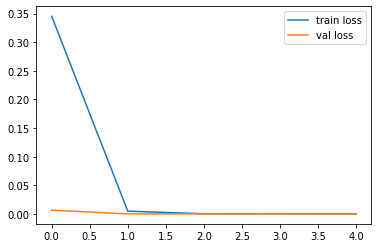

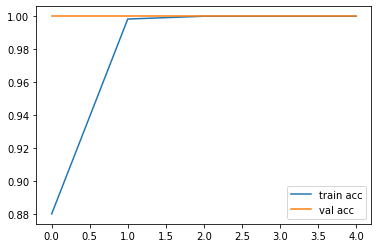

<Figure size 432x288 with 0 Axes>

In [13]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

from keras.models import load_model

model.save('facefeatures_new_model.h5')

In [16]:
from PIL import Image
import base64
import json
from io import BytesIO
import random

model = load_model('facefeatures_new_model.h5')

def face_extractor(img):

    faces = face_classifier.detectMultiScale(img, 1.3, 5)
    
    if faces is ():
        return None
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        cropped_face = img[y:y+h, x:x+w]

    return cropped_face


video = cv2.VideoCapture(0)
while True:
    _, frame = video.read()
    
    face = face_extractor(frame)
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224,224))
        im = Image.fromarray(face, 'RGB')
        img_array = np.array(im)
        img_array = np.expand_dims(img_array, axis = 0)
        pred = model.predict(img_array)
        
        name = 'None matching'
        
        if pred[0][0]>0.6:
            name = 'Medha'
        elif pred[0][1]>0.6:
            name = 'Nitin'
        elif pred[0][2] > 0.6:
            name = 'Siddhant'
        cv2.putText(frame, name, (50,50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    else:
        cv2.putText(frame,"No face found", (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0,255,0), 2)
    
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()